# Building Models

#### Importing libraries

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#### Importing constants

In [114]:
from src.constants_and_functions.constants import models_saving_folder

#### Loading Data

In [115]:
wine_statistics = pd.read_csv('\\Datasets and Projects\\WINE QUALITY\\Wine\\Data\\Processed\\Wine statistics(processed data).csv')
wine_statistics.head()

,Name,Year,Rating,Verdict,Color,Intensity,Aroma,Sweetness,Acidity,Alcohol,Tannin,Balance,Finish,Aftertaste
0,"EQUINOX, Luchineasa",2020,90.7,nice,9.0,9.0,9.4,9.0,8.9,8.9,8.9,8.9,8.9,8.4
1,"BAHU WINERY, Sauvignon Blanc",2020,89.8,nice,9.4,9.4,9.3,8.9,8.3,8.2,8.2,8.2,8.2,8.2
2,"CRAMA BAUER, Feteasca Alba",2019,91.9,fine,9.6,9.6,9.5,9.1,9.1,9.1,9.0,9.0,9.0,8.9
3,"BOUCHIÉ-CHATELLIER, Argile à Silex, Pouilly-Fumé",2019,92.8,fine,9.7,9.6,9.5,9.2,9.2,9.2,9.2,9.1,9.1,9.0
4,"RASOVA, Nud",2020,92.0,fine,9.5,9.5,9.4,9.2,9.2,9.1,9.1,9.0,9.0,9.0


## 1) Multi-Class Classifier with Tensorflow and Keras

In [116]:
# Removing unnecessary columns
wine = wine_statistics.drop(['Name', 'Year', 'Rating'], axis = 1)

In [117]:
wine

,Verdict,Color,Intensity,Aroma,Sweetness,Acidity,Alcohol,Tannin,Balance,Finish,Aftertaste
0,nice,9.0,9.0,9.4,9.0,8.9,8.9,8.9,8.9,8.9,8.4
1,nice,9.4,9.4,9.3,8.9,8.3,8.2,8.2,8.2,8.2,8.2
2,fine,9.6,9.6,9.5,9.1,9.1,9.1,9.0,9.0,9.0,8.9
3,fine,9.7,9.6,9.5,9.2,9.2,9.2,9.2,9.1,9.1,9.0
4,fine,9.5,9.5,9.4,9.2,9.2,9.1,9.1,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
867,fair,9.0,9.2,9.4,8.8,8.7,8.8,8.8,8.8,8.7,8.7
868,fair,9.0,9.0,9.3,8.8,8.7,8.8,8.7,9.0,8.7,8.5
869,nice,9.3,9.4,9.7,9.0,8.6,8.7,8.9,8.8,8.9,8.7
870,fair,9.2,9.2,9.4,8.8,8.7,8.7,8.6,8.8,8.7,8.7


In [118]:
# Splitting to train, test and validation datasets
train_dataset, test_dataset_1 =  train_test_split(wine, test_size=0.4)
test_dataset, valid_dataset =  train_test_split(test_dataset_1, test_size=0.5)

In [119]:
print(train_dataset.shape, test_dataset.shape, valid_dataset.shape)

(523, 11) (174, 11) (175, 11)


In [120]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

In [121]:
train_stats

,count,mean,std,min,25%,50%,75%,max
Color,523.0,9.456979,0.196043,8.7,9.4,9.5,9.6,10.0
Intensity,523.0,9.490249,0.159142,8.4,9.4,9.5,9.6,9.8
Aroma,523.0,9.518164,0.240519,7.5,9.5,9.6,9.7,9.9
Sweetness,523.0,8.888719,0.402586,1.0,8.8,8.9,9.0,9.7
Acidity,523.0,8.847228,0.410269,1.0,8.8,8.8,9.0,9.7
Alcohol,523.0,8.879350,0.207507,7.0,8.8,8.9,9.0,9.7
Tannin,523.0,8.847610,0.245903,7.0,8.7,8.8,9.0,9.7
Balance,523.0,8.832887,0.401612,1.0,8.8,8.8,9.0,9.5
Finish,523.0,8.942639,0.218753,8.0,8.8,8.9,9.0,9.6
Aftertaste,523.0,8.768834,0.253262,7.0,8.7,8.8,8.9,9.3


In [122]:
train_labels_names = train_dataset.pop('Verdict')
test_labels_names = test_dataset.pop('Verdict')
valid_labels_names = valid_dataset.pop('Verdict')

In [123]:
# Encoding 'Verdict'
train_labels = pd.get_dummies(train_labels_names, columns = ['Verdict'], prefix="Verdict")
test_labels = pd.get_dummies(test_labels_names, columns = ['Verdict'], prefix="Verdict")
valid_labels= pd.get_dummies(valid_labels_names, columns = ['Verdict'], prefix="Verdict")

In [124]:
train_labels

,Verdict_fair,Verdict_fine,Verdict_great,Verdict_nice
703,0,1,0,0
404,0,1,0,0
93,0,0,1,0
329,0,0,1,0
168,0,1,0,0
...,...,...,...,...
225,0,0,1,0
195,0,0,0,1
67,0,0,0,1
731,0,0,0,1


In [125]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
train_dataset = norm(train_dataset)
test_dataset = norm(test_dataset)
valid_dataset = norm(valid_dataset)

In [126]:
train_dataset

,Color,Intensity,Aroma,Sweetness,Acidity,Alcohol,Tannin,Balance,Finish,Aftertaste
703,0.219447,0.689645,0.756013,-0.220373,-0.115114,0.099515,0.619715,0.167109,0.262220,0.123060
404,0.729538,0.689645,0.756013,0.524810,0.372371,0.581425,0.619715,0.665102,0.262220,0.517907
93,1.239629,0.061275,-0.075522,0.524810,0.372371,1.063336,2.246371,0.416106,1.633631,1.307603
329,-2.331010,0.689645,0.340245,1.518386,1.347341,2.509067,1.433043,1.163096,1.633631,1.702450
168,0.729538,1.318014,1.171780,0.276416,0.616114,1.063336,0.619715,0.665102,0.719357,0.912755
...,...,...,...,...,...,...,...,...,...,...
225,0.219447,0.689645,0.756013,0.524810,0.372371,1.063336,2.246371,0.416106,2.090768,0.912755
195,0.219447,0.061275,-0.075522,-0.220373,0.128629,-0.382395,0.213051,-0.081888,-0.194917,0.123060
67,-0.800736,-0.567095,-0.907056,0.028022,0.128629,0.581425,0.213051,0.167109,0.262220,0.517907
731,-0.290645,0.061275,0.340245,-0.220373,0.128629,-0.864306,-0.600276,-0.081888,-1.109191,-0.271788


In [127]:
epochs = 1000
batch_size = 8
learning_rate =  0.0001
optimizer = optimizers.Adam(learning_rate)

In [128]:
# Building a Model
wine_classifier = tf.keras.Sequential()
wine_classifier.add(Dense(8, input_shape = (train_dataset.shape[1],)))
wine_classifier.add(Dense(4, activation='softmax'))
wine_classifier.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [129]:
wine_classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 88        
                                                                 
 dense_11 (Dense)            (None, 4)                 36        
                                                                 
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________


In [130]:
filepath = os.path.join(models_saving_folder, 'Wine Classifier(NN)')
model_saving = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)

In [131]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [132]:
history = wine_classifier.fit(
    train_dataset,
    train_labels,
    batch_size = batch_size,
    epochs=epochs,
    verbose=1,
    steps_per_epoch = int(train_dataset.shape[0] / batch_size),
    validation_data = (valid_dataset, valid_labels),
    callbacks=[callback, model_saving]
)

Epoch 1/1000
 1/65 [..............................] - ETA: 17s - loss: 1.4671 - accuracy: 0.2500
Epoch 00001: val_loss improved from inf to 1.48854, saving model to \Datasets and Projects\WINE QUALITY\Wine\models\Wine Classifier(NN)
INFO:tensorflow:Assets written to: \Datasets and Projects\WINE QUALITY\Wine\models\Wine Classifier(NN)\assets
65/65 [==============================] - 1s 7ms/step - loss: 1.6863 - accuracy: 0.1404 - val_loss: 1.4885 - val_accuracy: 0.1771
Epoch 2/1000
 1/65 [..............................] - ETA: 0s - loss: 2.0369 - accuracy: 0.0000e+00
Epoch 00002: val_loss improved from 1.48854 to 1.43587, saving model to \Datasets and Projects\WINE QUALITY\Wine\models\Wine Classifier(NN)
INFO:tensorflow:Assets written to: \Datasets and Projects\WINE QUALITY\Wine\models\Wine Classifier(NN)\assets
65/65 [==============================] - 0s 5ms/step - loss: 1.6231 - accuracy: 0.1534 - val_loss: 1.4359 - val_accuracy: 0.2000
Epoch 3/1000
 1/65 [.............................

In [133]:
print('Results of the last epochs')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Results of the last epochs


,loss,accuracy,val_loss,val_accuracy,epoch
434,0.212587,0.953398,0.201118,0.965714,434
435,0.204486,0.957282,0.200764,0.965714,435
436,0.209394,0.939806,0.200793,0.965714,436
437,0.208498,0.959223,0.201213,0.965714,437
438,0.196635,0.961165,0.202734,0.960000,438


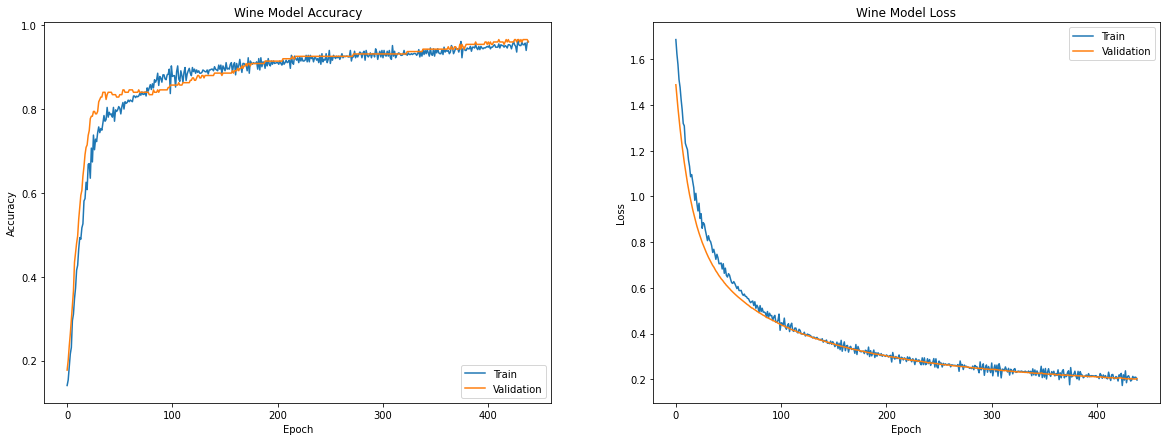

In [134]:
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Wine Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Wine Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

### Model Evaluation

In [135]:
print('Test Split: ')
loss, accuracy =  wine_classifier.evaluate(test_dataset, test_labels, verbose=1)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
6/6 [==============================] - 0s 997us/step - loss: 0.1911 - accuracy: 0.9425
Accuracy   :  0.94


### Confusion Matrix

In [136]:
predict_results = wine_classifier.predict(test_dataset)
predict_results= predict_results.argmax(axis = 1)
test_labels_names = test_labels_names.astype("category").cat.codes

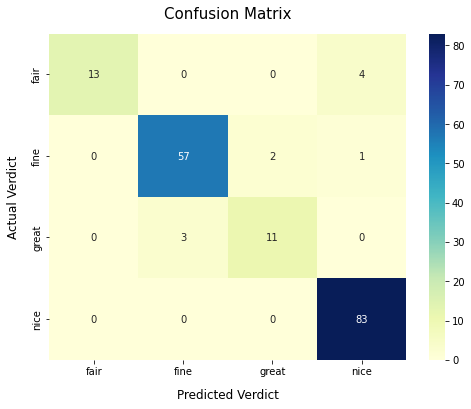

In [137]:
names = ['fair','fine','great', 'nice']
cm = confusion_matrix(test_labels_names, predict_results)
cm_df = pd.DataFrame(cm,
                     index = names,
                     columns = names)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix', fontsize = 15, pad = 15)
plt.ylabel('Actual Verdict', fontsize = 12, labelpad = 12)
plt.xlabel('Predicted Verdict', fontsize = 12, labelpad = 12)
plt.show()


## 2). Support Vector Machine Model

In [138]:
test_labels_names = test_labels_names.astype("category").cat.codes
train_labels_names = train_labels_names.astype("category").cat.codes
valid_labels_names = valid_labels_names.astype("category").cat.codes

In [139]:
model_svm = svm.SVC(C = 1, kernel='linear')

In [140]:
model_svm.fit(train_dataset, train_labels_names)
y_pred = model_svm.predict(test_dataset)

In [141]:
y_pred = model_svm.predict(train_dataset)
print("Train Accuracy:", metrics.accuracy_score(train_labels_names, y_pred))

Train Accuracy: 0.9732313575525813


In [142]:
y_pred = model_svm.predict(valid_dataset)
print("Valid Accuracy:", metrics.accuracy_score(valid_labels_names, y_pred))

Valid Accuracy: 0.96


In [143]:
y_pred = model_svm.predict(test_dataset)
print("Test Accuracy:", metrics.accuracy_score(test_labels_names, y_pred))

Test Accuracy: 0.9482758620689655


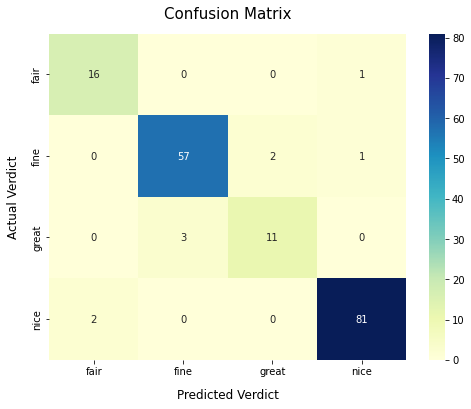

In [144]:
predict_results = model_svm.predict(test_dataset)

cm = confusion_matrix(test_labels_names, predict_results)
cm_df = pd.DataFrame(cm,
                     index = names,
                     columns = names)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix', fontsize = 15, pad = 15)
plt.ylabel('Actual Verdict', fontsize = 12, labelpad = 12)
plt.xlabel('Predicted Verdict', fontsize = 12, labelpad = 12)
plt.show()

In [145]:
# Saving model results
current_directory=os.getcwd()
os.chdir(models_saving_folder)
filename = 'SVM_classifier.sav'
pickle.dump(model_svm, open(filename, 'wb'))
os.chdir(current_directory)